# Plot file for csv criticality

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

import geopandas as gpd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import LineString
import matplotlib.colors as mcolors
from shapely import wkt

In [2]:
# df = pd.read_csv('../data/criticality_ranked_roads.csv')
df = pd.read_csv('../data/criticality_ranked_roads_FINAL.csv')

df.head(5)

,start_node,end_node,link_no,name,length,total_traffic,traffic_score,betweenness_score,economic_score,criticality_score,criticality_rank
0,"89.3719438,24.9973886","89.3688882,25.0130556",N5-39,Chowkirghat Z5072-Mokamtala (Int.with Z5035),1.782,7064.0,0.086558,1.000000,0.444507,0.724653,1.0
1,"89.3688882,25.0130556","89.3688882,25.0169438",N5-40,Mokamtala (Int.with Z5035)-Mokamtala (Int.with...,0.445,7064.0,0.086558,0.992098,0.444507,0.721492,2.0
2,"89.3688882,25.0169438","89.3689993,25.0240549",N5-41,Mokamtala (Int.with R550)-Kashipur (Mokamtala)...,0.790,7064.0,0.086558,0.982441,0.444507,0.717629,3.0
3,"89.3689993,25.0240549","89.3872219,25.1363886",N5-42,"Kashipur (Mokamtala) Z5507-Gobindaganj, R585",12.785,7064.0,0.086558,0.935031,0.444507,0.698665,4.0
4,"89.3872219,25.1363886","89.3894441,25.1511111",N5-43,"Gobindaganj, R585 -Nakaihat, Z5554",1.655,7064.0,0.086558,0.920983,0.444507,0.693046,5.0


In [3]:
# display(df[df['redundancy_score'] > 0].head(20))

#### Tranformation of the df

In [4]:
# Convert the start and end coordinates to a geometry column

df[['longitude_start', 'latitude_start']] = df['start_node'].str.split(',', expand=True)
df[['longitude_end', 'latitude_end']] = df['end_node'].str.split(',', expand=True)

df['longitude_start'] = df['longitude_start'].astype(float)
df['latitude_start'] = df['latitude_start'].astype(float)
df['longitude_end'] = df['longitude_end'].astype(float)
df['latitude_end'] = df['latitude_end'].astype(float)


# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude_start'], df['latitude_start']), crs="EPSG:4326")

# Create a column for the road nr
gdf['road_nr'] = gdf['link_no'].str.split('-').str[0]
gdf.head(2)

# gdf for the N and R roads
gdf_NR = gdf[gdf['road_nr'].str.startswith(('N', 'R'))]
display(gdf_NR.head(2))

print(f'Unique N and R road names: {len(gdf_NR["road_nr"].unique())}')


,start_node,end_node,link_no,name,length,total_traffic,traffic_score,betweenness_score,economic_score,criticality_score,criticality_rank,longitude_start,latitude_start,longitude_end,latitude_end,geometry,road_nr
0,"89.3719438,24.9973886","89.3688882,25.0130556",N5-39,Chowkirghat Z5072-Mokamtala (Int.with Z5035),1.782,7064.0,0.086558,1.000000,0.444507,0.724653,1.0,89.371944,24.997389,89.368888,25.013056,POINT (89.37194 24.99739),N5
1,"89.3688882,25.0130556","89.3688882,25.0169438",N5-40,Mokamtala (Int.with Z5035)-Mokamtala (Int.with...,0.445,7064.0,0.086558,0.992098,0.444507,0.721492,2.0,89.368888,25.013056,89.368888,25.016944,POINT (89.36889 25.01306),N5


Unique N and R road names: 196


### Test for only the N1 - road

In [5]:
def choropleth_map(gdf, column, title='Choropleth Map'):
    fig, ax = plt.subplots(figsize=(10, 8))

    gdf = gdf.dropna(subset=[column])
    gdf[column] = pd.to_numeric(gdf[column], errors='coerce')

    cmap = plt.get_cmap("Blues")
    
    # Create a new colormap that starts from a darker shade
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        "Blues_adjusted", cmap(np.linspace(0.4, 1, 256)))

    gdf.plot(column=column, 
            ax=ax,
            scheme='quantiles',
            k=5,
            cmap=new_cmap,
            alpha=0.75,
            legend_kwds={"title": f"{column}", 
                    #  "loc":"lower center",
                    #  "bbox_to_anchor": (0.62, 0),
                     "fmt": "{:.2f}",
                     'prop': {"size":8}
                     },
            legend=True
    )
    plt.title(title, fontsize=16)
    plt.axis('off')
    ax.set_aspect('equal')
    plt.tight_layout()

    # Save the figure
    plt.savefig(f'../img/{title}.png', dpi=350, bbox_inches='tight')
    plt.show()


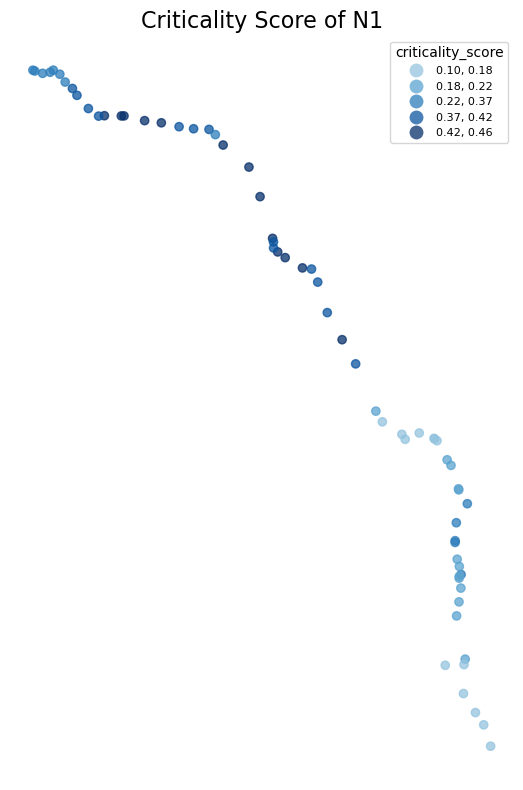

In [6]:
choropleth_map(gdf[gdf['road_nr'] == 'N1'], 'criticality_score', title='Criticality Score of N1')

c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


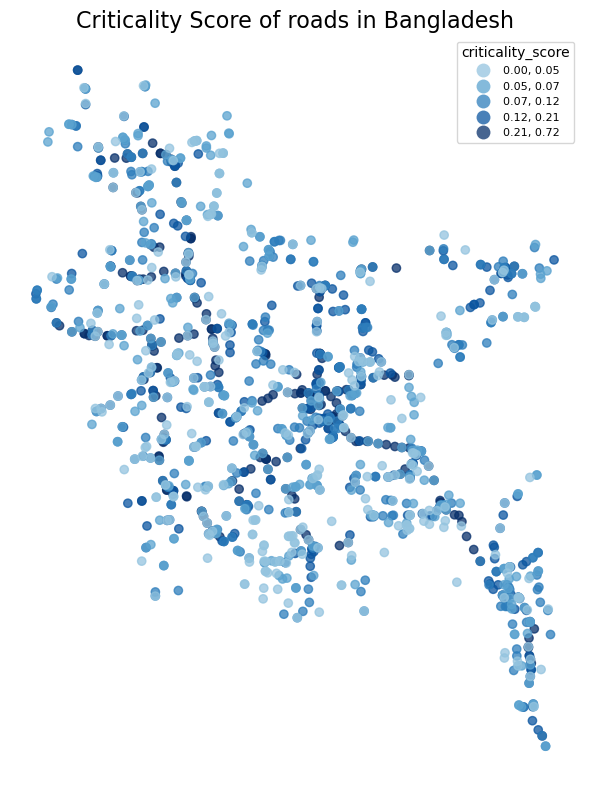

In [7]:
choropleth_map(gdf, 'criticality_score', title='Criticality Score of roads in Bangladesh')

c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


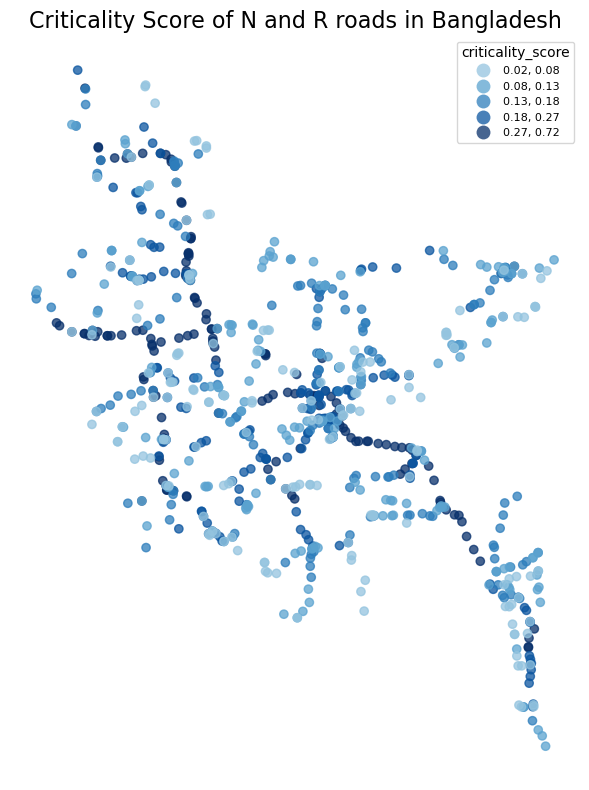

In [8]:
choropleth_map(gdf_NR, 'criticality_score', title='Criticality Score of N and R roads in Bangladesh')

# Methodology
Methodology for Analyzing Road Criticality
1. Data Aggregation & Summary Statistics

To identify the most critical roads, the criticality_score should be aggregated per road_nr. Consider the following metrics:

- Mean Criticality Score per Road:
    - Provides a general understanding of how critical a road is on average.

- Maximum Criticality Score per Road:
    - Highlights the most critical segment of each road.

- Standard Deviation of Criticality Score:
    - Indicates the variability in criticality along the same road. A high value suggests uneven distribution.

- Traffic Influence on Criticality:
    - Comparing total_traffic and criticality_score can reveal whether heavily used roads are also the most critical.

Potential Insights:

- Roads with high mean and high max criticality are consistently critical.
- Roads with low mean but high max criticality may have localized bottlenecks or weak points.
- Roads with high variability may indicate areas where targeted interventions (e.g., lane expansions, alternative routes) are needed.

2. Visualizing the Distribution of Criticality

To effectively communicate results in a policy-oriented manner, use visual methods instead of long tables.
Key Visualization Techniques:

- Histogram of Criticality Scores
    - overall distribution of criticality levels.
    - Helps determine whether most roads have moderate criticality or if there are outliers with extremely high scores.

- Boxplot of Criticality Scores per Road
    - Reveals variability in criticality within each road.
    - Highlights outliers, which are roads with unusually high criticality.

- Scatter Plot: Criticality vs. Traffic
    - Helps assess whether traffic congestion correlates with high criticality.
    - Can be color-coded based on road rankings.

- Bar Chart of Top 10 Critical Roads
    - Displays roads ranked by mean/max criticality score.
    - Makes it easier to compare high-risk roads.

Potential Insights:

- If the histogram is skewed right, most roads have low criticality, but a few roads dominate the network risk.
- Outliers in the boxplot might indicate single segments that disproportionately contribute to road vulnerability.
- The scatter plot can support or refute policy assumptions about the relationship between traffic and criticality.

3. Mapping Criticality for Spatial Insights

Mapping is crucial for translating insights into actionable policies. Consider the following maps:

- Criticality Score Heatmap (Choropleth)
    - Roads colored based on mean/max criticality.
    - Helps visually identify clusters of critical roads.
- Top 10 Critical Roads Highlighted
    - Emphasizes the most vulnerable roads in red or another distinct color.
 - Provides a clear takeaway for policymakers.

- Traffic-Weighted Criticality Map
    -  Uses total_traffic and criticality_score together.
    - Roads with both high traffic and high criticality are the most policy-relevant.

Potential Insights:
- If highly critical roads are clustered in urban areas, local infrastructure improvements may be needed.
- If criticality is spread out, a network-wide intervention (such as redundancy planning) might be required.

4. Policy Recommendations Based on Visualizations

To align with the rubric, every figure should contribute to non-trivial insights. Policy-supporting recommendations may include:

    Which roads should be prioritized for reinforcement?

    Are critical roads correlated with high-traffic roads?

    Should alternative routes or redundancy improvements be introduced?

    Are there unexpected high-risk areas that need further investigation?

By integrating statistical analysis, visualization, and policy interpretation, the methodology ensures that results are meaningful and actionable.

Would you like additional refinements 

## 1. Data Aggregation & Summary Statistics
Output:
- Statistics info on criticality score
- Plot map of roads with highest mean criticality
- Plot map of roads with max criticality
- 

In [9]:
gdf['criticality_score'].describe()

count    1419.000000
mean        0.132326
std         0.118019
min         0.000559
25%         0.052774
50%         0.090875
75%         0.170891
max         0.724653
Name: criticality_score, dtype: float64

In [10]:
# Aggregate criticality per road
grouped = gdf.groupby("road_nr").agg(
    mean_criticality=("criticality_score", "mean"),
    max_criticality=("criticality_score", "max"),
    std_criticality=("criticality_score", "std"),
    # count_points=("criticality_score", "count")
).reset_index()

# filter out the non- Z or N roads
grouped = grouped[grouped['road_nr'].str.startswith(('N', 'R'))]
print(len(grouped))

# Sort roads by mean and max criticality
top_10_mean = grouped.nlargest(10, "mean_criticality")
top_10_max = grouped.nlargest(10, "max_criticality")


196


In [11]:
print("Top 10 roads by mean criticality:")
display(top_10_mean[['road_nr', 'mean_criticality']])

print("Top 10 roads by max criticality:")
display(top_10_max[['road_nr', 'max_criticality']])

# Check if there is oerlap between the two lists
overlap = set(top_10_mean['road_nr']).intersection(set(top_10_max['road_nr']))
print(f"Overlap between top 10 by mean and max criticality: {overlap}")

Top 10 roads by mean criticality:


,road_nr,mean_criticality
36,N5,0.431863
4,N105,0.372994
125,R303,0.340968
122,R283,0.340674
64,N704,0.319195
42,N507,0.310968
168,R711,0.301585
0,N1,0.296966
25,N302,0.291072
33,N406,0.285761


Top 10 roads by max criticality:


,road_nr,max_criticality
36,N5,0.724653
0,N1,0.463919
55,N6,0.416157
4,N105,0.414238
64,N704,0.410629
60,N7,0.343353
125,R303,0.340968
122,R283,0.340674
89,R140,0.336481
16,N2,0.315895


Overlap between top 10 by mean and max criticality: {'R303', 'N105', 'N704', 'R283', 'N5', 'N1'}


This indicates there is quite some overlap between the top 10 for highest mean and max criticality

## 2. Visualizing the Distribution of Criticality

In [12]:
# Import full road network
all_roads = gpd.read_file('_roads3.csv')
print(f'Unique road names: {len(all_roads["road"].unique())}')
print(f'unique N and R roads: {len(all_roads[all_roads["road"].str.startswith(("N", "R"))]["road"].unique())}')
roads_gdf = gpd.GeoDataFrame(all_roads, geometry=gpd.points_from_xy(all_roads['lon'], all_roads['lat']), crs="EPSG:4326")
roads_gdf = roads_gdf.dropna(subset=['lon', 'lat'])
roads_gdf.head()

roads_gdf_N_R = roads_gdf[roads_gdf['road'].str.startswith(('N', 'R'))]

Unique road names: 847
unique N and R roads: 206


In [13]:
def plot_road_network(gdf, title='Road Network', color='#6b9fcc', critical_roads=None, label_critical_roads='Critical Roads'):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the road network using a deep blue color from 'Blues' cmap
    gdf['geometry'].plot(ax=ax, color=color, markersize=6, alpha=0.8, label='Roads')

    if critical_roads is not None:
        # Highlight critical roads in a strong navy blue
        critical_roads['geometry'].plot(ax=ax, color='#08306b', markersize=8, alpha=0.9, label=label_critical_roads)

    # Title, labels, and legend
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_title(title, fontsize=16, pad=15, fontweight='bold')
    
    # Improve legend placement
    ax.legend(fontsize=12, loc='upper right', frameon=True)

    # Ensure equal aspect ratio
    ax.set_aspect('equal')

    # Save the figure
    plt.savefig(f'../img/{title}.png', dpi=350, bbox_inches='tight')

    plt.show()


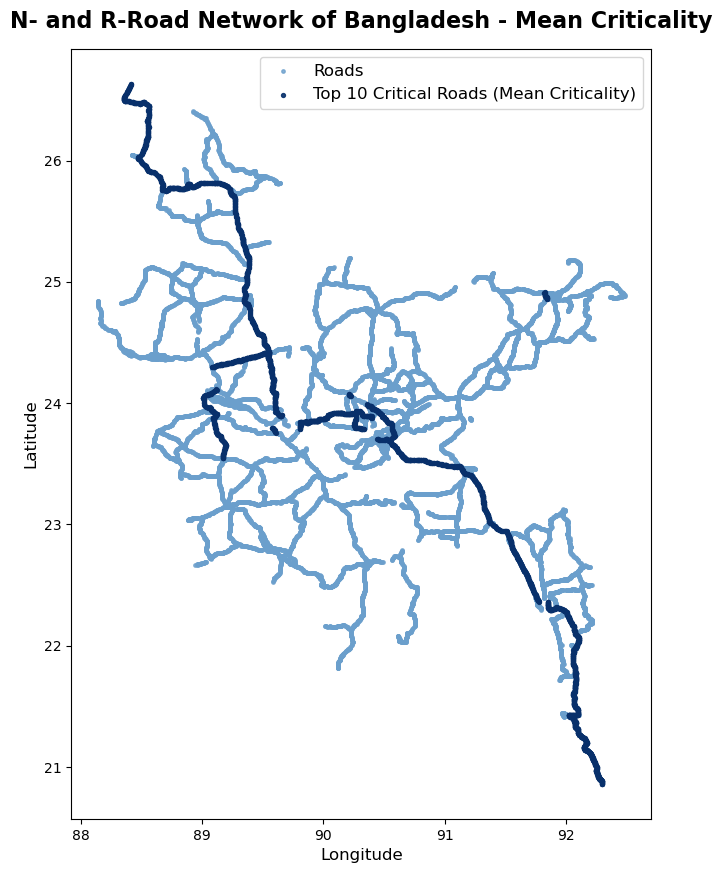

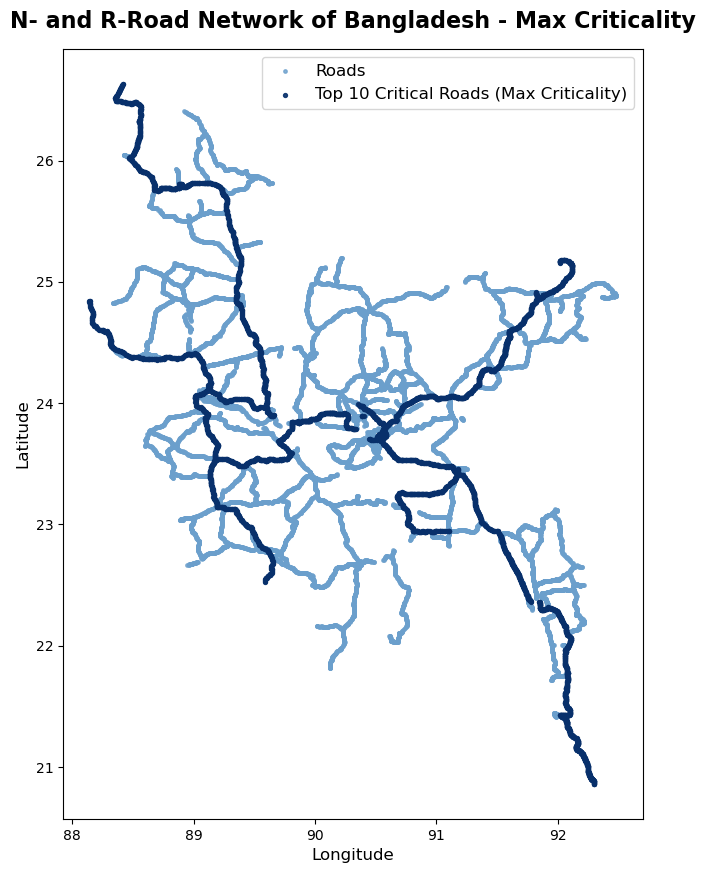

In [14]:
# Plot the top 10 mean critical roads on the road network
critical_roads = roads_gdf[roads_gdf['road'].isin(top_10_mean['road_nr'])]

plot_road_network(roads_gdf_N_R, 
                    title='N- and R-Road Network of Bangladesh - Mean Criticality', 
                    critical_roads=critical_roads, 
                    label_critical_roads='Top 10 Critical Roads (Mean Criticality)'
                    )

# Plot the top 10 max critical roads on the road network
critical_roads = roads_gdf[roads_gdf['road'].isin(top_10_max['road_nr'])]

plot_road_network(roads_gdf_N_R,
                    title='N- and R-Road Network of Bangladesh - Max Criticality', 
                    critical_roads=critical_roads, 
                    label_critical_roads='Top 10 Critical Roads (Max Criticality)'
                    )

c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


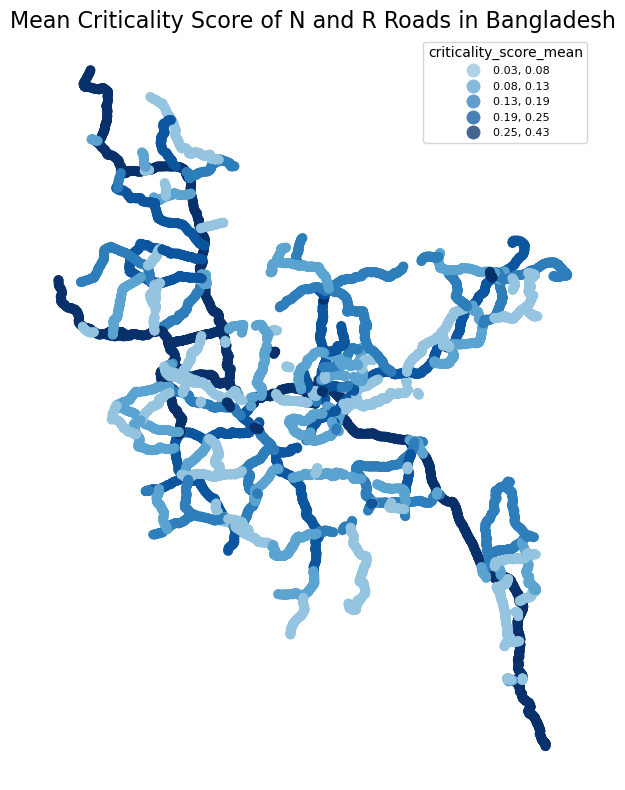

c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


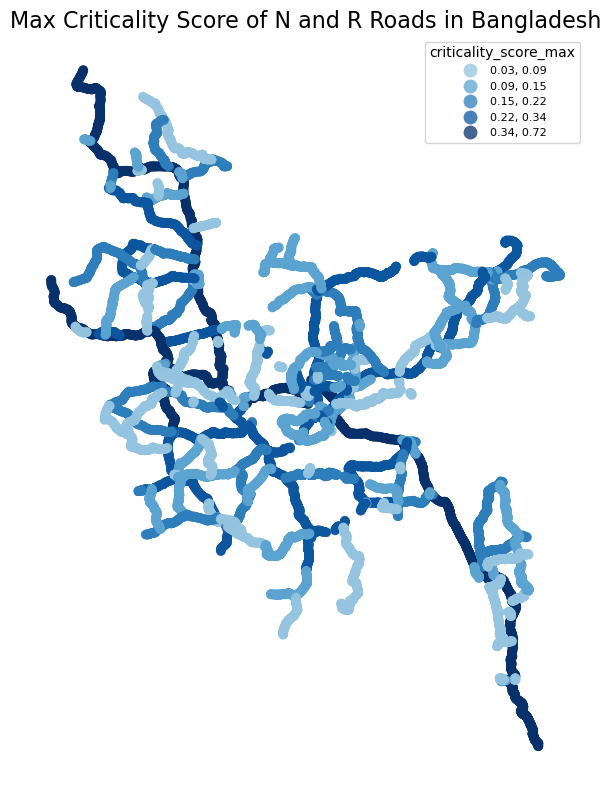

In [15]:
# Plot the mean criticality scores of all N and R roads, using a chropleth map
roads_gdf_N_R['criticality_score_mean'] = roads_gdf_N_R['road'].map(grouped.set_index('road_nr')['mean_criticality'])

choropleth_map(roads_gdf_N_R,
                column='criticality_score_mean', 
                title='Mean Criticality Score of N and R Roads in Bangladesh',
                )

# Plot the max criticality scores of all N and R roads, using a chropleth map
roads_gdf_N_R['criticality_score_max'] = roads_gdf_N_R['road'].map(grouped.set_index('road_nr')['max_criticality'])

choropleth_map(roads_gdf_N_R,
                column='criticality_score_max', 
                title='Max Criticality Score of N and R Roads in Bangladesh',
                )

In [16]:
# --- 1. Histogram of Criticality Scores ---
def plot_histogram(gdf, column="criticality_score", title="Distribution of Criticality Scores", xlabel="Criticality Score"):
    if column not in gdf.columns:
        raise ValueError(f"Column '{column}' not found in GeoDataFrame")

    sns.set_style("white")
    
    plt.figure(figsize=(8, 5))
    sns.histplot(gdf[column], bins=30, kde=True, color="#6b9fcc")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title(title, fontsize=14)
    sns.despine()

    # Save the figure
    plt.savefig(f'../img/{title}.png', dpi=350, bbox_inches='tight')

    plt.show()


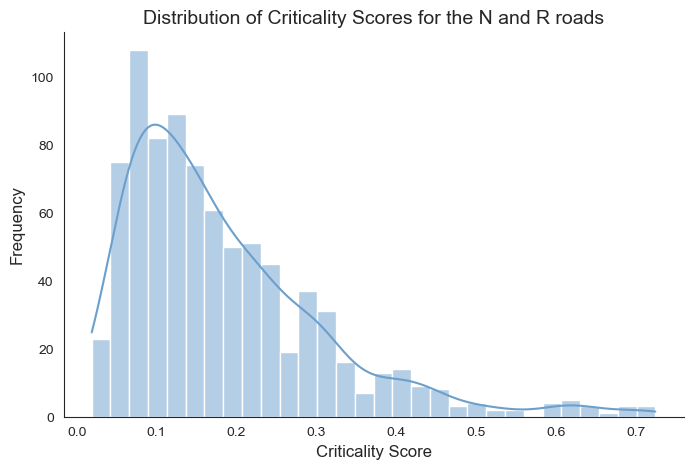

In [17]:
plot_histogram(gdf_NR, column="criticality_score", title="Distribution of Criticality Scores for the N and R roads", xlabel="Criticality Score")

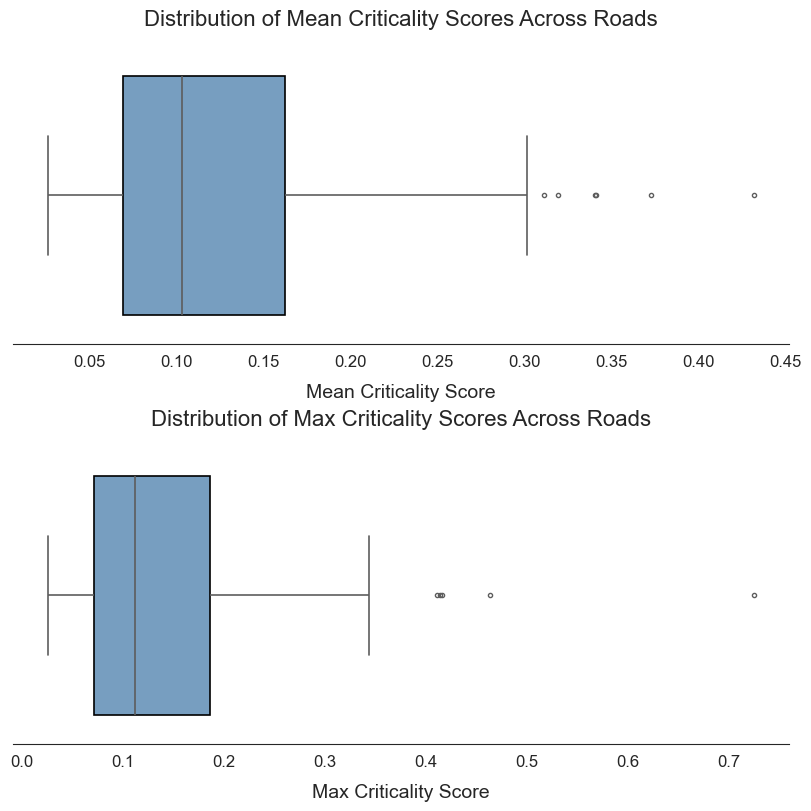

In [18]:
# --- 2. Boxplot of Criticality Scores per Road ---

def plot_criticality_boxplots(grouped_df, mean_column="mean_criticality", max_column="max_criticality", subject="Criticality"):
    if mean_column not in grouped_df.columns or max_column not in grouped_df.columns:
        raise ValueError(f"Columns '{mean_column}' or '{max_column}' not found in DataFrame")

    fig, ax = plt.subplots(2, 1, figsize=(8, 8), constrained_layout=True)

    box_color = "#6b9fcc"  # Professional blue
    edge_color = "black"  # Box border color

    # Mean Score Boxplot
    sns.boxplot(data=grouped_df, x=mean_column, color=box_color, ax=ax[0], 
                linewidth=1.2, fliersize=3, boxprops=dict(edgecolor=edge_color))
    ax[0].set_xlabel(f"Mean {subject} Score", fontsize=14, labelpad=10)
    title = f"Distribution of Mean {subject} Scores Across Roads"
    ax[0].set_title(title, fontsize=16, pad=15)

    # Max Score Boxplot
    sns.boxplot(data=grouped_df, x=max_column, color=box_color, ax=ax[1], 
                linewidth=1.2, fliersize=3, boxprops=dict(edgecolor=edge_color))
    ax[1].set_xlabel(f"Max {subject} Score", fontsize=14, labelpad=10)
    ax[1].set_title(f"Distribution of Max {subject} Scores Across Roads", fontsize=16, pad=15)

    # Remove unnecessary spines and improve clarity
    for a in ax:
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines['left'].set_visible(False)
        a.tick_params(axis='x', labelsize=12)

    sns.despine(left=True)

    # Save the figure
    plt.savefig(f'../img/{title}.png', dpi=350, bbox_inches='tight')

    plt.show()

plot_criticality_boxplots(grouped, mean_column="mean_criticality", max_column="max_criticality")

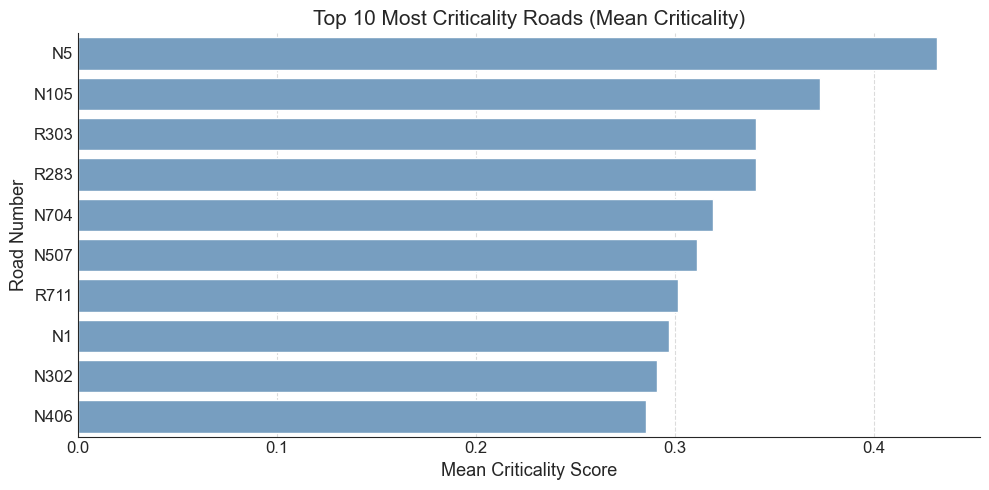

In [19]:
# --- 3. Barplot of Top Critical Roads ---
def plot_top_critical_roads(top_critical_df, road_column="road_nr", subject_column="mean_criticality", subject="Criticality"):
    if road_column not in top_critical_df.columns or subject_column not in top_critical_df.columns:
        raise ValueError(f"Columns '{road_column}' or '{subject_column}' not found in DataFrame")

    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_critical_df, y=road_column, x=subject_column, color="#6b9fcc")
    
    plt.xlabel(f"Mean {subject} Score", fontsize=13)
    plt.ylabel("Road Number", fontsize=13)
    title = f"Top 10 Most {subject} Roads (Mean {subject})"
    plt.title(title, fontsize=15)

    # Refine tick marks
    plt.tick_params(axis='both', which='both', length=0)  # Remove ticks for a cleaner look
    plt.xticks(fontsize=12)  # Adjust font size for better readability
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for clarity

    # Improve spacing and avoid cutoffs
    plt.tight_layout()
    sns.despine()

    # Save the figure
    plt.savefig(f'../img/{title}.png', dpi=350, bbox_inches='tight')

    plt.show()

plot_top_critical_roads(top_10_mean)


# Vulnerability

In [20]:
df_vuln = pd.read_excel('../data/BMMS_overview_vulnerability.xlsx')
display(df_vuln.head(5))


,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,...,sub-division,lat,lon,EstimatedLoc,Hazard Level,Hazard Index,Bridge Weight,Infrastructure Vulnerability Index,Vulnerability Score,Vulnerability Category
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,...,Narayanganj-1,23.698739,90.458861,interpolate,5.527596,0.552760,0.1,0.000628,0.016756,Low
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,...,Narayanganj-1,23.694664,90.487775,interpolate,5.456871,0.545687,0.1,0.000134,0.007803,Low
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,...,Narayanganj-1,23.705060,90.523214,interpolate,5.722322,0.572232,0.1,0.004392,0.043345,Low
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,...,Vitikandi,23.694391,90.537574,interpolate,5.987373,0.598737,0.1,0.000058,0.004820,Low
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,...,Vitikandi,23.694302,90.537707,interpolate,5.656775,0.565678,0.1,0.000058,0.005011,Low


#### Tranformation of the df

In [21]:
gdf_vuln = gpd.GeoDataFrame(df_vuln, geometry=gpd.points_from_xy(df_vuln['lon'], df_vuln['lat']), crs="EPSG:4326")
gdf_vuln.head(5)

# gdf for the N and R roads
gdf_vuln_NR = gdf_vuln[gdf_vuln['road'].str.startswith(('N', 'R'))]
display(gdf_vuln_NR.head(2))

print(f'Unique N and R road names: {len(gdf_vuln_NR["road"].unique())}')


,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,...,lat,lon,EstimatedLoc,Hazard Level,Hazard Index,Bridge Weight,Infrastructure Vulnerability Index,Vulnerability Score,Vulnerability Category,geometry
0,N1,1.800,Box Culvert,LRP001a,.,11.3,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,...,23.698739,90.458861,interpolate,5.527596,0.552760,0.1,0.000628,0.016756,Low,POINT (90.45886 23.69874)
1,N1,4.925,Box Culvert,LRP004b,.,6.6,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,...,23.694664,90.487775,interpolate,5.456871,0.545687,0.1,0.000134,0.007803,Low,POINT (90.48777 23.69466)


Unique N and R road names: 153


### Test for only the N1 - road

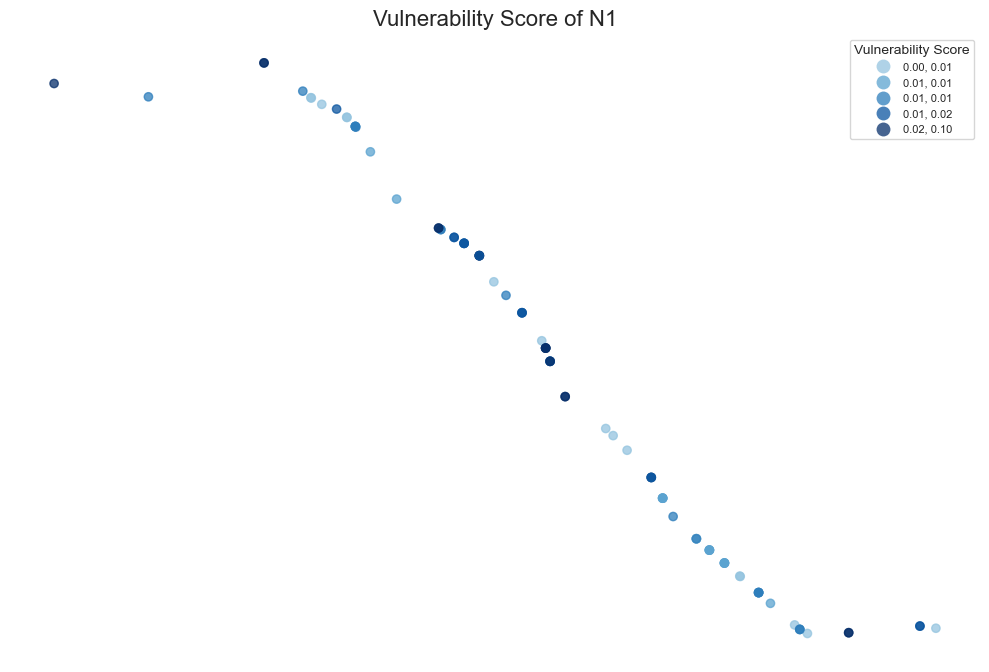

In [22]:
# Create a column for the road nr
choropleth_map(gdf_vuln[gdf_vuln['road'] == 'N1'], 'Vulnerability Score', title='Vulnerability Score of N1')

c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


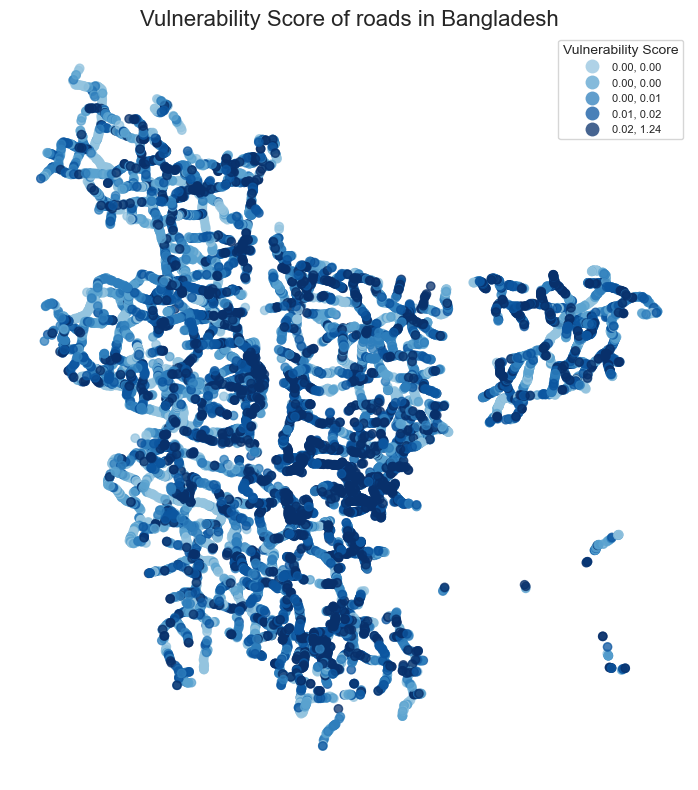

In [23]:
choropleth_map(gdf_vuln, 'Vulnerability Score', title='Vulnerability Score of roads in Bangladesh')

c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


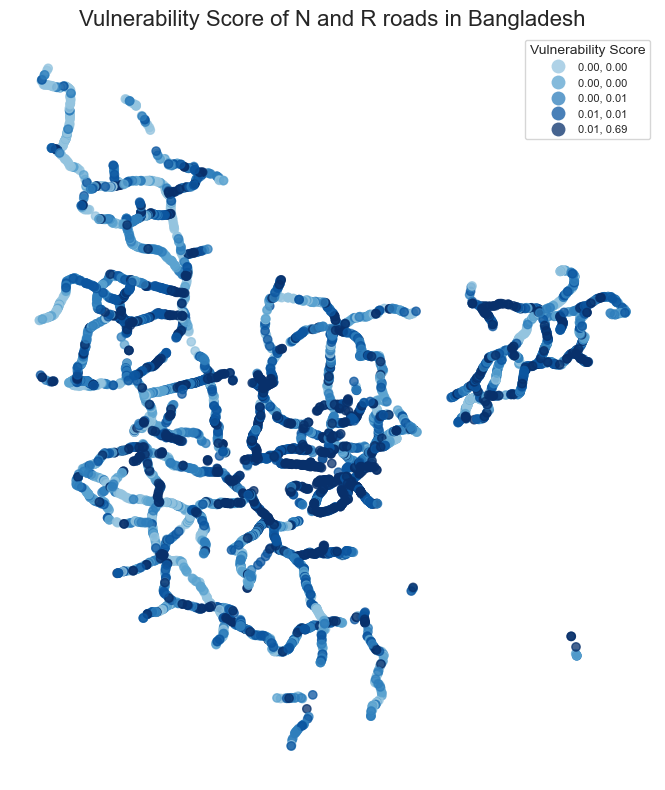

In [24]:
choropleth_map(gdf_vuln_NR , 'Vulnerability Score', title='Vulnerability Score of N and R roads in Bangladesh')

# Methodology

## 1. Data Aggregation & Summary Statistics
Output:
- Statistics info on vulnerability score
- Plot map of roads with highest mean vulnerability
- Plot map of roads with max vulnerability


In [25]:
gdf_vuln['Vulnerability Score'].describe()

count    15004.000000
mean         0.011770
std          0.025038
min          0.000381
25%          0.002774
50%          0.005642
75%          0.012393
max          1.235050
Name: Vulnerability Score, dtype: float64

In [26]:
# Aggregate vulnerability per road
grouped_vuln = gdf_vuln.groupby("road").agg(
    mean_vulnerability=("Vulnerability Score", "mean"),
    max_vulnerability=("Vulnerability Score", "max"),
    std_vulnerability=("Vulnerability Score", "std"),
    # count_points=("Vulnerability Score", "count")
).reset_index()

# filter out the non- Z or N roads
grouped_vuln = grouped_vuln[grouped_vuln['road'].str.startswith(('N', 'R'))]
print(len(grouped_vuln))

# Sort roads by mean and max vulnerability
vuln_top_10_mean = grouped_vuln.nlargest(10, "mean_vulnerability")
vuln_top_10_max = grouped_vuln.nlargest(10, "max_vulnerability")


153


In [27]:
print("Top 10 roads by mean vulnerability:")
display(vuln_top_10_mean[['road', 'mean_vulnerability']])

print("Top 10 roads by max vulnerability:")
display(vuln_top_10_max[['road', 'max_vulnerability']])

# Check if there is oerlap between the two lists
overlap = set(vuln_top_10_mean['road']).intersection(set(vuln_top_10_max['road']))
print(f"Overlap between top 10 by mean and max vulnerability: {overlap}")

Top 10 roads by mean vulnerability:


,road,mean_vulnerability
91,R303,0.137933
108,R546,0.113152
122,R602,0.108852
50,N803,0.087371
42,N703,0.085034
20,N403,0.080667
75,R201,0.073718
144,R813,0.066474
93,R311,0.064420
25,N503,0.061715


Top 10 roads by max vulnerability:


,road,max_vulnerability
106,R506,0.691851
3,N105,0.372954
22,N5,0.363533
36,N6,0.323287
108,R546,0.315090
42,N703,0.266588
145,R820,0.213045
49,N8,0.210771
50,N803,0.204763
111,R549,0.203374


Overlap between top 10 by mean and max vulnerability: {'R546', 'N703', 'N803'}


## 2. Visualizing the Distribution of Vulnerability

In [28]:
# Import full road network
all_roads = gpd.read_file('_roads3.csv')
print(f'Unique road names: {len(all_roads["road"].unique())}')
print(f'unique N and R roads: {len(all_roads[all_roads["road"].str.startswith(("N", "R"))]["road"].unique())}')
roads_gdf = gpd.GeoDataFrame(all_roads, geometry=gpd.points_from_xy(all_roads['lon'], all_roads['lat']), crs="EPSG:4326")
roads_gdf = roads_gdf.dropna(subset=['lon', 'lat'])
roads_gdf.head()

roads_gdf_N_R = roads_gdf[roads_gdf['road'].str.startswith(('N', 'R'))]

Unique road names: 847
unique N and R roads: 206


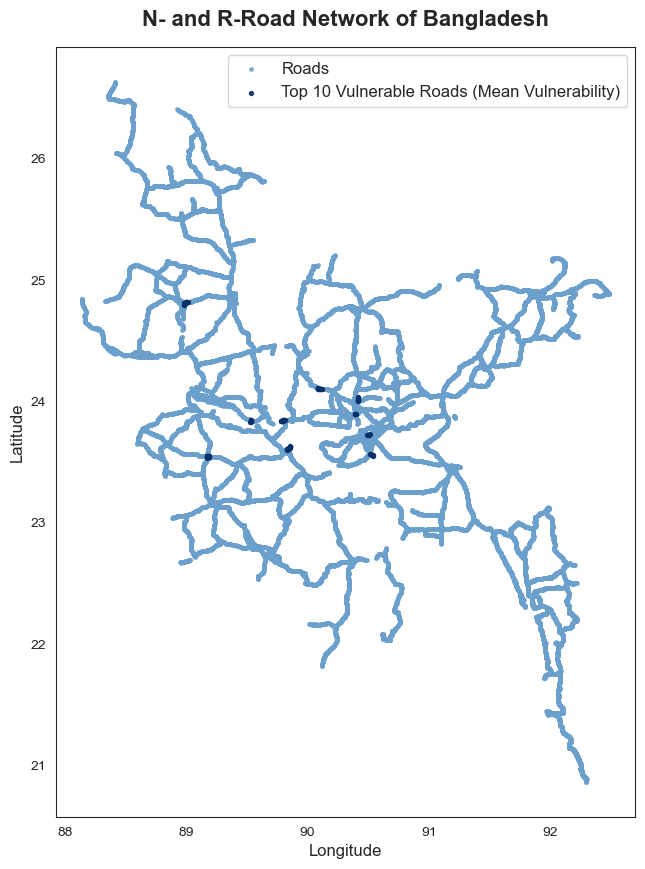

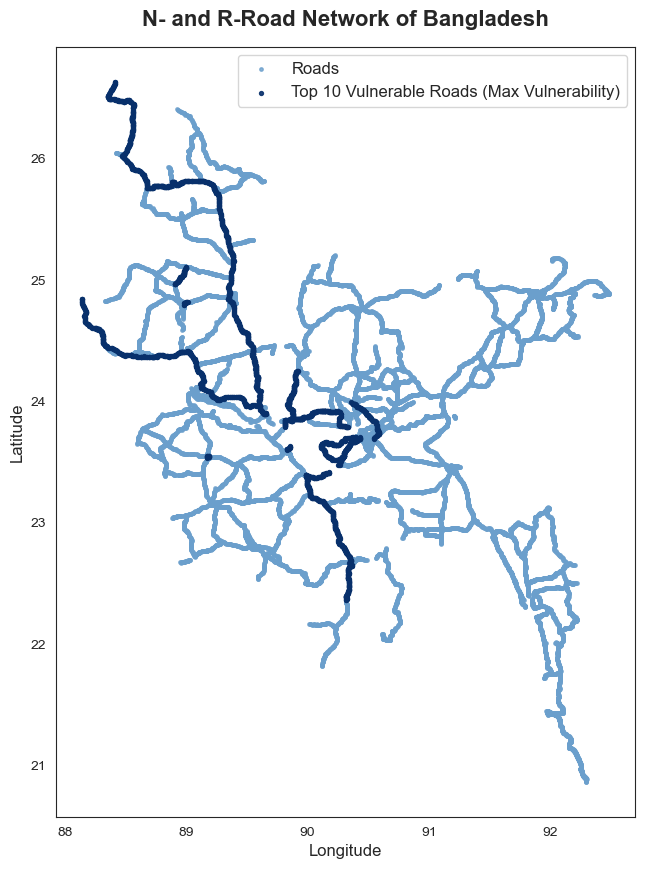

In [29]:
# Plot the top 10 mean vulnerable roads on the road network
vulnerable_roads = roads_gdf[roads_gdf['road'].isin(vuln_top_10_mean['road'])]

plot_road_network(roads_gdf_N_R, 
                    title='N- and R-Road Network of Bangladesh', 
                    critical_roads=vulnerable_roads, 
                    label_critical_roads='Top 10 Vulnerable Roads (Mean Vulnerability)'
                    )

# Plot the top 10 max critical roads on the road network
vulnerable_roads = roads_gdf[roads_gdf['road'].isin(vuln_top_10_max['road'])]

plot_road_network(roads_gdf_N_R,
                    title='N- and R-Road Network of Bangladesh', 
                    critical_roads=vulnerable_roads, 
                    label_critical_roads='Top 10 Vulnerable Roads (Max Vulnerability)'
                    )

c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


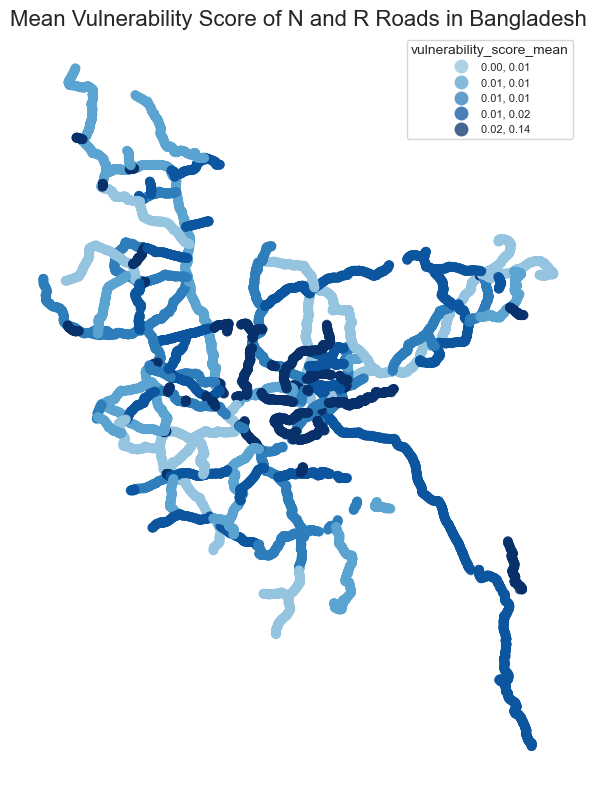

c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\groen\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


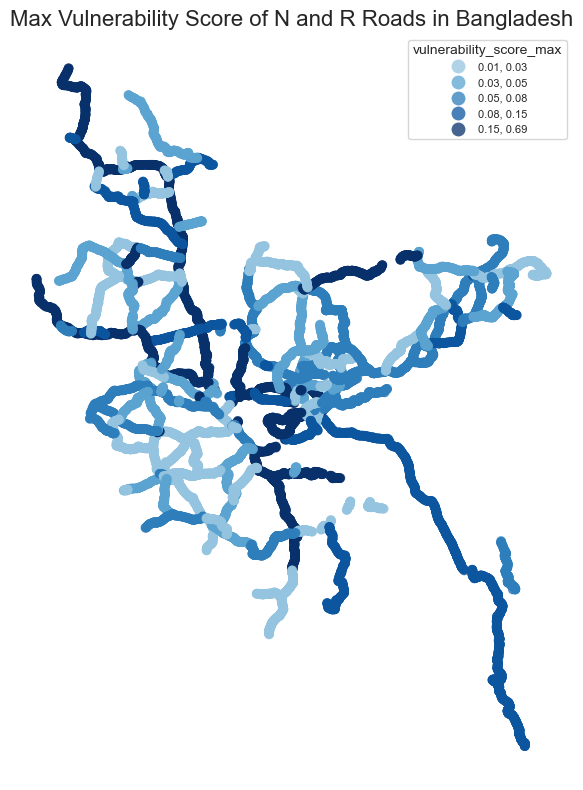

In [30]:
# Plot the mean vulnerability scores of all N and R roads, using a chropleth map
roads_gdf_N_R['vulnerability_score_mean'] = roads_gdf_N_R['road'].map(grouped_vuln.set_index('road')['mean_vulnerability'])

choropleth_map(roads_gdf_N_R,
                column='vulnerability_score_mean', 
                title='Mean Vulnerability Score of N and R Roads in Bangladesh',
                )

# Plot the max criticality scores of all N and R roads, using a chropleth map
roads_gdf_N_R['vulnerability_score_max'] = roads_gdf_N_R['road'].map(grouped_vuln.set_index('road')['max_vulnerability'])

choropleth_map(roads_gdf_N_R,
                column='vulnerability_score_max', 
                title='Max Vulnerability Score of N and R Roads in Bangladesh',
                )

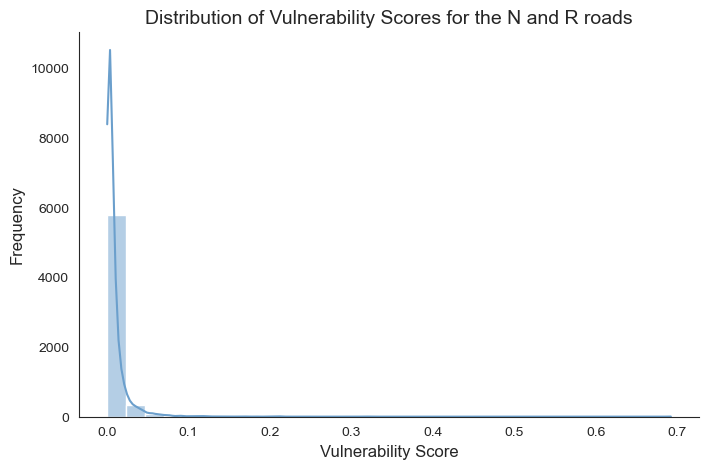

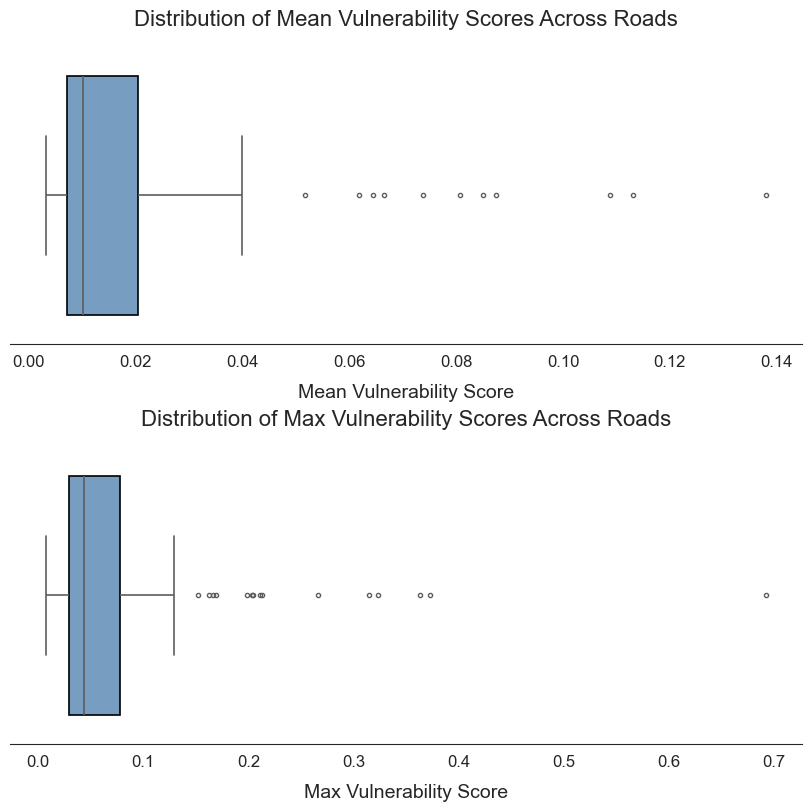

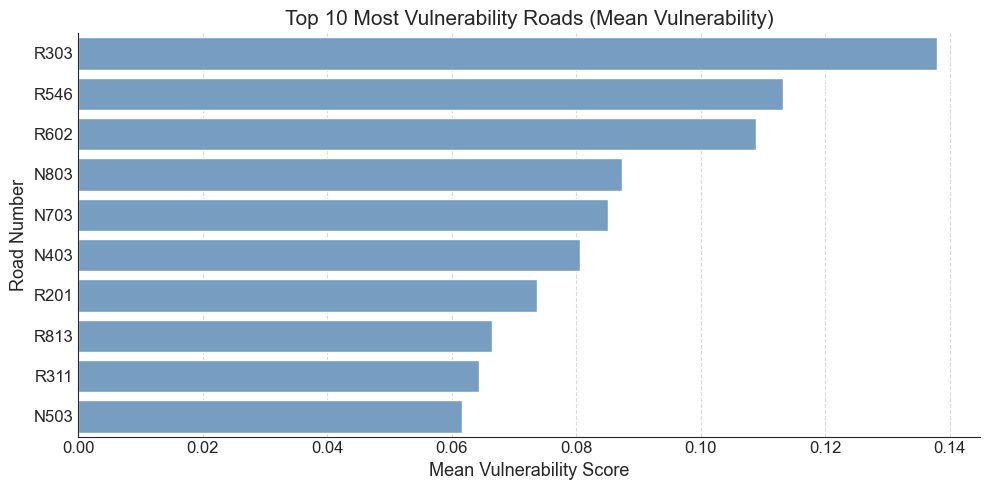

In [31]:
# --- 1. Histogram of Vulnerability Scores ---
plot_histogram(gdf_vuln_NR, column="Vulnerability Score", title="Distribution of Vulnerability Scores for the N and R roads", xlabel="Vulnerability Score")

# --- 2. Boxplot of Vulnerability Scores per Road ---
plot_criticality_boxplots(grouped_vuln, mean_column="mean_vulnerability", max_column="max_vulnerability", subject="Vulnerability")

# --- 3. Barplot of top 10 Vulnerability Scores per Road ---
plot_top_critical_roads(vuln_top_10_mean, road_column="road", subject_column="mean_vulnerability", subject="Vulnerability")
